<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [36]:
# Check for GPU
!nvidia-smi

Thu Jun 26 20:46:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 556.12                 Driver Version: 556.12         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   60C    P8             15W /  115W |     224MiB /   6144MiB |     31%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [37]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.6.0+cpu


'cpu'

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [38]:
from torchvision import datasets, transforms

# get raw data
train_data = datasets.MNIST(
    root="data",
    train= True,
    transform= transforms.ToTensor(),
    download= True
)

test_data = datasets.MNIST(
    root="data",
    train= False,
    transform= transforms.ToTensor(),
    download= True
)

len(train_data), len(test_data)


(60000, 10000)

In [39]:
img, label = train_data[0]

print(f"img = {img}")
print(f"label = {label}")

random_index = int(torch.randint(0, len(train_data), size=[1]))
random_index

img = tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0

5046

In [40]:
class_names = train_data.classes

class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

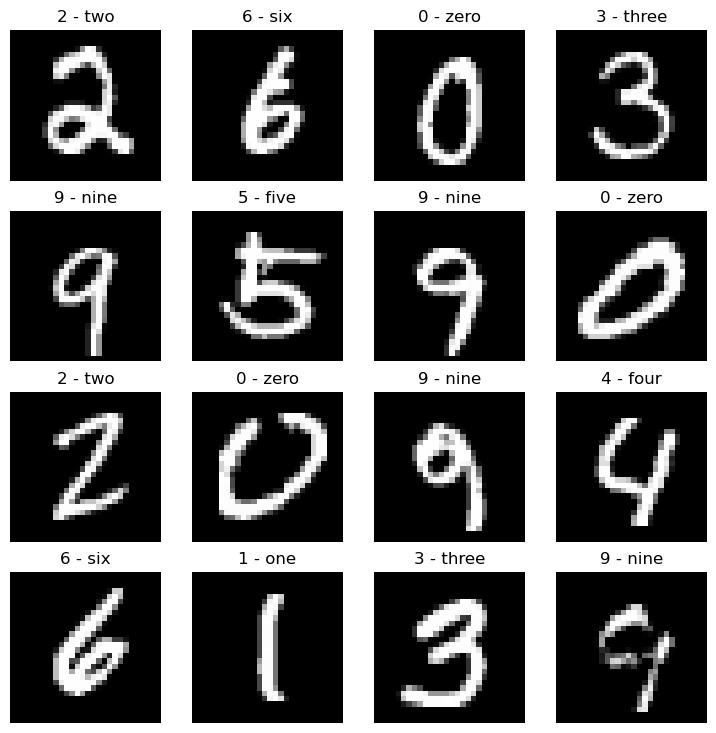

In [41]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(9,9))
rows, cols = 4,4

for i in range(1, rows*cols +1):
    random_index = torch.randint(0, len(train_data), size=[1]).item() # ".item()" to switch from tensor to int
    
    img, label = train_data[random_index]
    
    fig.add_subplot(rows, cols, i)
    
    
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [42]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,
                            batch_size = BATCH_SIZE,
                            shuffle = True,
)
test_dataloader = DataLoader(test_data,
                            batch_size = BATCH_SIZE,
                            shuffle = False,
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(60000/32)
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")
print(10000/32) # gets rounded up, and the last batch has less than 32 items in it

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000022984DA7C20>, <torch.utils.data.dataloader.DataLoader object at 0x00000229847CFBC0>)
Length of train dataloader: 1875 batches of 32
1875.0
Length of test dataloader: 313 batches of 32
312.5


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [43]:
from torch import nn

class MNIST_model (nn.Module):
    def __init__(self, 
                input_shape:int,
                hidden_units:int,
                output_shape:int):
        super().__init__()
        
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                    out_channels= hidden_units,
                    kernel_size= 3),
            nn.ReLU(),
            
            nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3),
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                    out_channels= hidden_units,
                    kernel_size= 3),
            nn.ReLU(),
            
            nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3),
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2)
        )
        
        # Calculate the flattened feature size after conv blocks
        with torch.no_grad():
            dummy_input = torch.zeros(1, input_shape, 28, 28)
            x = self.block_1(dummy_input)
            x = self.block_2(x)
            num_features = x.shape[1] * x.shape[2] * x.shape[3]
            
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features= num_features,
                out_features= output_shape
            )
        )
        
    def forward (self, x:torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        
        return x
    

number_model = MNIST_model(input_shape=1,
                    hidden_units=32,
                    output_shape=len(class_names))

number_model

MNIST_model(
  (block_1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=512, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [44]:
from torchmetrics import Accuracy

acc_metric = Accuracy(task="multiclass", num_classes=len(class_names))
loss_fn = nn.CrossEntropyLoss()
optm = torch.optim.SGD(params= number_model.parameters(),
                    lr = 0.1)


def train_fn (model:nn.Module,
                accuracy_function,
                loss_function:nn.Module,
                optimizer: torch.optim.Optimizer,
                dataloader:DataLoader,
                device:torch.device = "cpu"):
    
    losses, accuracy = 0,0
    
    model.to(device)
    model.train()
    
    for x,y in dataloader:
        x, y = x.to(device), y.to(device)
        
        # 1) forward pass
        y_pred = model(x)
        
        # 2) count the losses
        loss = loss_function(y_pred, y)
        losses += loss
        accuracy_function.update(y_pred.argmax(dim=1), y)
        
        # 3) optimizer zero grad
        optimizer.zero_grad()
        
        # 4) backward loss
        loss.backward()
        
        # 5) optimizer step 
        optimizer.step()
        
    # Calculate loss and accuracy per epoch and print out what's happening
    losses /= len(dataloader)
    accuracy = accuracy_function.compute().item()
    accuracy *= 100
    accuracy_function.reset()  
    
    print(f"Train loss: {losses:.5f} | Train accuracy: {accuracy:.2f}%")
    
    
    
def test_fn (model:nn.Module,
                accuracy_function,
                loss_function:nn.Module,
                dataloader:DataLoader,
                device:torch.device = "cpu"):
    
    losses, accuracy = 0,0
    
    model.to(device)
    model.eval()
    
    with torch.inference_mode():
        for x,y in dataloader:
            x, y = x.to(device), y.to(device)
            
            # 1) forward pass
            y_pred = model(x)
            
            # 2) count the losses
            losses += loss_function(y_pred, y)
            accuracy_function.update(y_pred.argmax(dim=1), y)
            
        # Calculate loss and accuracy per epoch and print out what's happening
        losses /= len(dataloader)
        accuracy = accuracy_function.compute().item()
        accuracy *= 100
        accuracy_function.reset()  
            
        print(f"Test loss: {losses:.5f} | Test accuracy: {accuracy:.2f}%\n")
            

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

start_time_train = timer()
EPOCHS = 5

for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch: {epoch}\n----------------------")
    train_fn(model=number_model,
            accuracy_function= acc_metric,
            loss_function= loss_fn,
            optimizer= optm,
            dataloader= train_dataloader)

    test_fn(model=number_model,
            accuracy_function= acc_metric,
            loss_function= loss_fn,
            dataloader= test_dataloader)

end_time_train = timer()
total_train_time = end_time_train-start_time_train

minutes = int(total_train_time // 60)
seconds = total_train_time % 60
print(f"Time taken = {minutes} minutes and {seconds:.2f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
----------------------
Train loss: 0.20619 | Train accuracy: 93.22%
Test loss: 0.05568 | Test accuracy: 98.23%

Epoch: 1
----------------------
Train loss: 0.06015 | Train accuracy: 98.15%
Test loss: 0.04743 | Test accuracy: 98.48%

Epoch: 2
----------------------
Train loss: 0.04582 | Train accuracy: 98.55%
Test loss: 0.04033 | Test accuracy: 98.63%

Epoch: 3
----------------------
Train loss: 0.03693 | Train accuracy: 98.84%
Test loss: 0.04495 | Test accuracy: 98.49%

Epoch: 4
----------------------
Train loss: 0.03169 | Train accuracy: 99.01%
Test loss: 0.03158 | Test accuracy: 98.96%

Time taken = 146.79519439999785


In [ ]:
def eval_model(model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                accuracy_fn,
                device: torch.device = "cpu"):
    
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """   
    
    loss, acc = 0,0
    model.eval()
    model.to(device)
    
    with torch.inference_mode():
        for X,y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            accuracy_fn.update(y_pred.argmax(dim=1), y)  
            
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc = accuracy_fn.compute().item()
        acc *= 100 
        accuracy_fn.reset()     
        
        return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model results on test dataset
number_model_results = eval_model(model=number_model, 
                            data_loader=test_dataloader,
                            loss_fn=loss_fn, 
                            accuracy_fn=acc_metric
)
number_model_results

{'model_name': 'MNIST_model',
 'model_loss': 0.03158078342676163,
 'model_acc': 98.96000027656555}

In [53]:
import random
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=16): # k=16 to get 16 random samples
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (5 - five)


In [54]:
def make_predictions(model: nn.Module, data:list, device:torch.device = "cpu"):
    '''
    data here is the original data list not the data_loader!
    '''
    pred_probs = []
    model.eval()
    
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device
            
            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)
            
            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)
            
            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)


# Make predictions on test samples with model 2
pred_probs= make_predictions(model=number_model, 
                            data=test_samples)

pred_classes = pred_probs.argmax(dim=1)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.5339e-10, 7.9520e-13, 1.9806e-09, 6.4561e-07, 2.6246e-11, 9.9997e-01,
         1.7225e-08, 1.9995e-10, 3.9736e-08, 2.5129e-05],
        [2.3732e-13, 4.4542e-09, 9.2526e-09, 6.1968e-05, 1.3993e-10, 1.2027e-07,
         8.6809e-18, 9.9993e-01, 5.8463e-11, 4.1850e-06]])

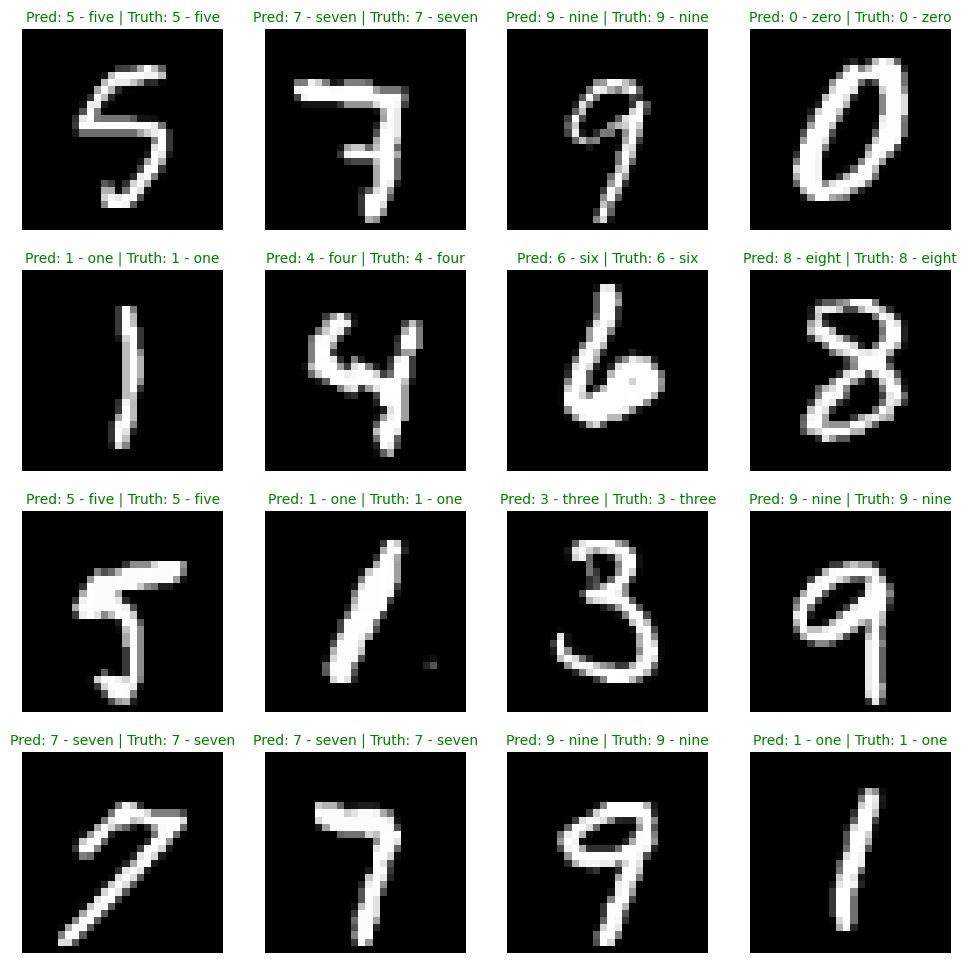

In [55]:
# Plot predictions
plt.figure(figsize=(12, 12))
nrows = 4
ncols = 4
for i, sample in enumerate(test_samples):
    # Create a subplot
    plt.subplot(nrows, ncols, i+1)  
    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")   
    # Find the prediction label (in text form, e.g. "Sandal")
    pred_label = class_names[pred_classes[i]]   
    # Get the truth label (in text form, e.g. "T-shirt")
    truth_label = class_names[test_labels[i]]   
    # Create the title text of the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality and change title colour accordingly
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g") # green text if correct
    else:
        plt.title(title_text, fontsize=10, fontweight = "bold", c="r") # red text if wrong
    plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [56]:
# 1. Make predictions with trained model
y_preds = []
number_model.eval()

with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions"):
        # Do the forward pass
        y_logits = number_model(X)
        # Turn predictions from logits -> prediction probabilities -> predictions labels
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim = 1)
        y_preds.append(y_pred)

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

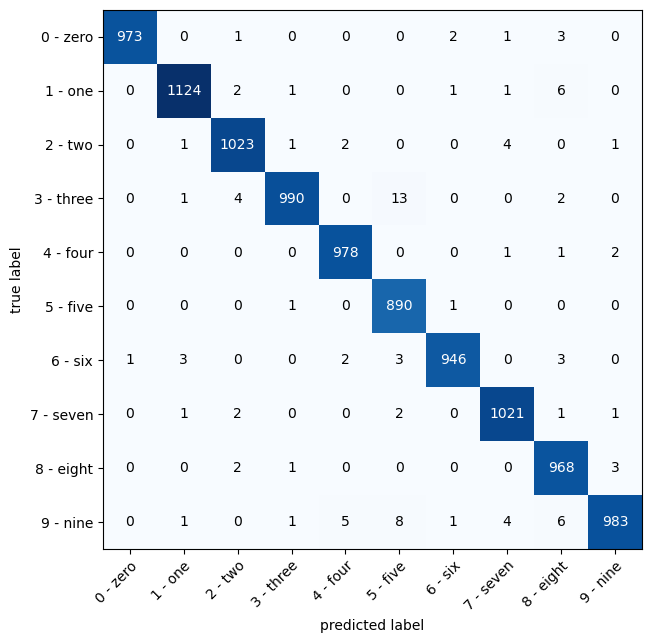

In [57]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
con_mat = ConfusionMatrix(num_classes= len(class_names), task = "multiclass")
con_mat_tensor = con_mat(preds = y_pred_tensor,
                        target = test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat =con_mat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names = class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);


In [59]:
# save model

torch.save(
    obj = number_model.state_dict(),
    f = "models/MNIST_Model.pth"
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?